In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train_data_chrome = pd.read_parquet(
    "../data/processed/chrome/08_12_2022/train_set_01_processed.parquet.gzip"
)
test_data_brave = pd.read_parquet(
    "../data/processed/brave/08_12_2022/test_set_all_processed.parquet.gzip"
)
test_data_firefox = pd.read_parquet(
    "../data/processed/firefox/08_12_2022/test_set_01_processed.parquet.gzip"
)

<AxesSubplot:xlabel='tracker', ylabel='Count'>

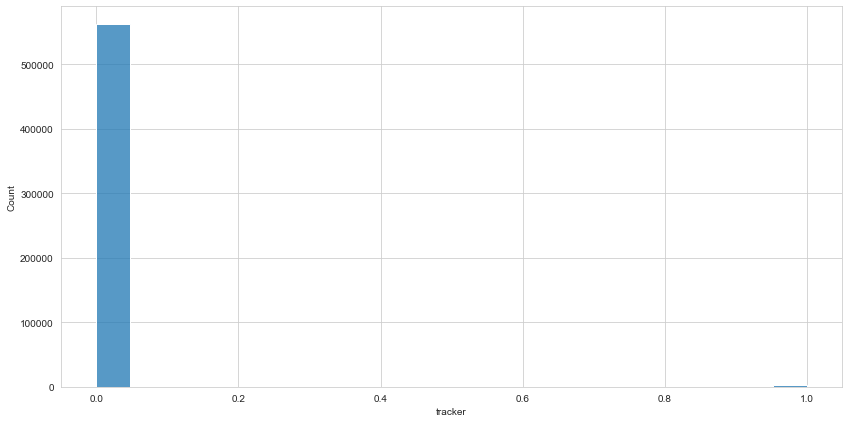

In [3]:
plt.figure(figsize=(14, 7))
sns.histplot(test_data_brave, x="tracker")

In [4]:
print(train_data_chrome.tracker.value_counts() / len(train_data_chrome))
print(test_data_firefox.tracker.value_counts() / len(test_data_firefox))
print(test_data_brave.tracker.value_counts() / len(test_data_brave))

0    0.715743
1    0.284257
Name: tracker, dtype: float64
0    0.712411
1    0.287589
Name: tracker, dtype: float64
0    0.994908
1    0.005092
Name: tracker, dtype: float64


In [7]:
train_data_chrome.dtypes

hostname                category
pathname                category
filetype                category
filename                category
pragma                  category
                          ...   
x-cdn-pop               category
x-cdn-pop-ip            category
tracker                    int32
comb_col_non_tracker       int64
comb_col_tracker           int64
Length: 157, dtype: object

<ipython-input-63-c658546b153b>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels([''], fontsize=14)


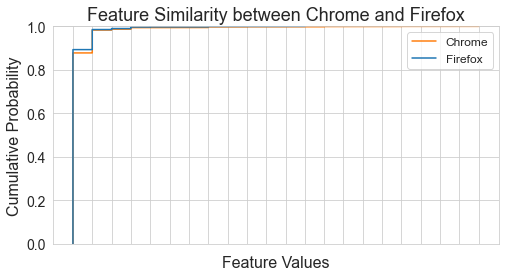

In [63]:
feature = 'x-xss-protection'
df = pd.DataFrame({
    feature: np.concatenate((train_data_chrome.loc[:, feature], test_data_firefox.loc[:, feature])),
    'set': ['training'] * train_data_chrome.shape[0] + ['test'] * test_data_firefox.shape[0]
})

plt.figure(figsize=(8, 4))
g = sns.ecdfplot(data=df, x=feature, hue='set', log_scale=False, legend=False)

plt.title('Feature Similarity between Chrome and Firefox', fontsize=18)
plt.xlabel('Feature Values', fontsize=16)
plt.ylabel('Cumulative Probability', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
g.set_xticklabels([''], fontsize=14)
plt.legend(labels=['Chrome', 'Firefox'], fontsize=12)
plt.show()

In [56]:
train_data_chrome.vary.value_counts()

accept-encoding                                                                          109646
origin                                                                                    10199
accept                                                                                     5605
accept-encoding, origin                                                                    2399
origin, accept-encoding                                                                    1743
                                                                                          ...  
cookie,accept-encoding,origin                                                                 1
accept-encoding, origin, accept-encoding, bypass-verso-payment, cn-experiments, verso         1
partnerpage-origin, accept-encoding                                                           1
cookie, user-agent                                                                            1
x-xp-unsplash-plus-2, x-logged-in, x-loc